1. Loading the Labels (Images) and save them as numpy array

In [21]:
# imports
from google.colab import drive
from PIL import Image
import numpy as np
import os
import pandas as pd

In [4]:
# Mount your Google Drive
drive.mount('/content/drive')

# Set the path to the folder containing the PNG images
folder_path = 'drive/MyDrive/Y-data/HW_3_DL/cell-dataset/data/labels'

Mounted at /content/drive


In [19]:
# init the numpy arrays
label_value_list = [] # ini a list of count - the label
label_name_list = []  #init a list of label names/indeces

# Loop through each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        image = Image.open(os.path.join(folder_path, filename))
        # Convert the image to a NumPy array
        array = np.array(image)
        sum_arr = np.sum(array.flatten())  # number of red dots*255
        label_value_list.append(int(sum_arr/255))  # list of labels with values
        label_name_list.append(filename)            # list of labels "names"

In [23]:
# create a df for labels:
df = pd.DataFrame({"label_ind":label_name_list, "label_val": label_value_list})

In [25]:
df.head()

,label_ind,label_val
0,187dots.png,95
1,196dots.png,84
2,191dots.png,154
3,192dots.png,128
4,197dots.png,218


In [27]:
df.describe()

,label_val
count,200.000000
mean,175.960000
std,61.398594
min,74.000000
25%,123.500000
50%,174.500000
75%,218.250000
max,317.000000


In [32]:
# sort the df by index and filter to have only 180 first images = the last are 20 for test set
sorted_df = df.sort_values('label_ind', ascending=True)

# save 180 for train set and 20 for test set???
train_df = sorted_df.iloc[:180]
test_df = sorted_df.iloc[180:]


In [2]:
# read the data


# Load the JPG image using PIL
image = Image.open('001dots.png')

# Convert the PIL Image to a NumPy array
array = np.array(image)

# Print the shape of the array
print(array.shape)

(256, 256, 3)


we can see that each label has a dim of  (256,256,3) - but isn't it binary? let's imshow it:

In [4]:
# imshow the first label:
image.mode

'RGB'

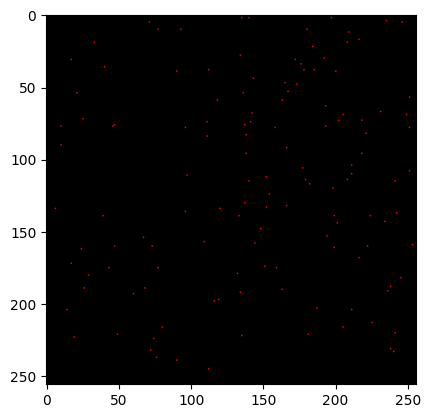

In [6]:
# Display the image using Matplotlib
import matplotlib.pyplot as plt

plt.imshow(array)
plt.show()

In [13]:
# let's show the value of a single pixel in all three channels:
array[0,23:30] 
# we found one pixel which hase the RED value as 255, and rest - zeros. 


array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [15]:
# one way to count all red dots is the normalize the image and then sum, of first sum then normalize by 255 (assuming all same intensity)
count = sum(array)
count

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [254,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [254,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [255,   0,   0],
       [255,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [255,   0,   0],
       [  0,   0

In [17]:
# Sum only the second dimension
sum_arr = np.sum(array, axis=0)
sum_arr

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [510,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [510,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [255,   0,   0],
       [255,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [255,   0,   0],
       [255,   0,   0],
       [  0,   0

In [ ]:
array[0,:] # first colom in the image is all zeros..

In [18]:


# Flatten the array and compute the sum of its elements
sum_arr = np.sum(array.flatten())

# Print the original array and the sum of its elements
print("Original array:\n", array)
print("Sum of all elements:", sum_arr)

Original array:
 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Sum of all elements: 34425


In [19]:
COLAB = True

In [25]:
from google.colab import drive
from PIL import Image
import numpy as np
import os


label_value_list = [] # ini a list of count - the label
label_name_list = []  #init a list of label names/indeces
# Mount your Google Drive
drive.mount('/content/drive')

# Set the path to the folder containing the PNG images
folder_path = 'drive/MyDrive/Y-data/HW_3_DL/cell-dataset/data/labels'

# Loop through each image in the folder
for filename in os.listdir(folder_path):
  if filename.endswith('.png'):
    # Load the PNG image using PIL
    image = Image.open(os.path.join(folder_path, filename))

    # Convert the image to a NumPy array
    array = np.array(image)
    sum_arr = np.sum(array.flatten())
    print(sum_arr)
    label_list.append(sum_arr)
    # Save the array to a file
    np.save(os.path.join(folder_path, f'{filename[:-4]}.npy'), array)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
34425
56865
54060
50490
58140
34680
34935
50235
60690
36210
45390
48450
65025
51000
28560
24735
49980
28305
42840
80325
61455
40290
46665
76755
49725
50235
37230
50745
19890
39525
56865
29835
36465
31110
42840
24480
20910
59415
29325
43095
21930
48960
22695
52530
40545
32895
32130
53040
71400
29835
57375
24480
48960
44625
25500
41820
68595
67320
42840
36975
47685
26520
45645
64005
55590
62220
80070
65790
44115
70890
58650
48705
51510
55845
39525
54060
28305
39270
47430
65025
61710
23715
26265
63750
61455
41310
21165
31110
50490
52530
46155
40800
41310
70635
36720
30600
22950
48450
27540
51000
34170
60435
56355
61710
49215
53805
56100
23460
33150
32130
64260
49470
26010
34170
39780
37485
35445
29580
78030
64770
65535
26520
28560
52785
75225
19890
52785
30855
54570
50745
58905
34680
28050
59925
41310
24480
40545
44880
51510
36975
75735
54825
24990
33915
44370
8

In [26]:
label_list

[34425,
 56865,
 54060,
 50490,
 58140,
 34680,
 34935,
 50235,
 60690,
 36210,
 45390,
 48450,
 65025,
 51000,
 28560,
 24735,
 49980,
 28305,
 42840,
 80325,
 61455,
 40290,
 46665,
 76755,
 49725,
 50235,
 37230,
 50745,
 19890,
 39525,
 56865,
 29835,
 36465,
 31110,
 42840,
 24480,
 20910,
 59415,
 29325,
 43095,
 21930,
 48960,
 22695,
 52530,
 40545,
 32895,
 32130,
 53040,
 71400,
 29835,
 57375,
 24480,
 48960,
 44625,
 25500,
 41820,
 68595,
 67320,
 42840,
 36975,
 47685,
 26520,
 45645,
 64005,
 55590,
 62220,
 80070,
 65790,
 44115,
 70890,
 58650,
 48705,
 51510,
 55845,
 39525,
 54060,
 28305,
 39270,
 47430,
 65025,
 61710,
 23715,
 26265,
 63750,
 61455,
 41310,
 21165,
 31110,
 50490,
 52530,
 46155,
 40800,
 41310,
 70635,
 36720,
 30600,
 22950,
 48450,
 27540,
 51000,
 34170,
 60435,
 56355,
 61710,
 49215,
 53805,
 56100,
 23460,
 33150,
 32130,
 64260,
 49470,
 26010,
 34170,
 39780,
 37485,
 35445,
 29580,
 78030,
 64770,
 65535,
 26520,
 28560,
 52785,
 75225,


In [27]:
import csv

# Create a list of data
data = [['John', 'Doe', 35],
        ['Jane', 'Smith', 28],
        ['Bob', 'Johnson', 42]]

# Set the path to the CSV file
csv_file = 'label_value_list.csv'

# Write the data to the CSV file
with open(csv_file, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(label_list)

Error: ignored

In [29]:
type(label_list)

list

In [28]:
# Set the path to the CSV file
csv_file = 'label_value_list.csv'

# Write the data to the CSV file
np.savetxt(csv_file, label_list, delimiter=',')